In [1]:
from azure.ai.ml import MLClient
from azure.identity import DefaultAzureCredential

wind_name = "wind_bench"
wind_version = 1


# authenticate
credential = DefaultAzureCredential()

# Get a handle to the workspace
ml_client = MLClient(
    credential=credential,
    subscription_id="8a889cf2-7b3d-4003-824e-b503f56604b0",
    resource_group_name="rg-jef-ml",
    workspace_name="ml-gpu",
)


# update the 'my_path' variable to match the location of where you downloaded the data on your
# local filesystem

## create data asset if it doesn't already exist:
data_asset = ml_client.data.get(name=wind_name, version=wind_version)
print(
    f"Data asset already exists. Name: {data_asset.path}, version: {data_asset.version}"
)

parquet_file = data_asset.path

Data asset already exists. Name: azureml://subscriptions/8a889cf2-7b3d-4003-824e-b503f56604b0/resourcegroups/rg-jef-ml/workspaces/ml-gpu/datastores/workspaceblobstore/paths/UI/2023-11-29_114659_UTC/wind_bench.parquet/, version: 1


In [2]:

wind_columns = [
    "id",
    "Free wind speed Vx pos    0.00,   0.00,-150.00",
    "Free wind speed Vy pos    0.00,   0.00,-150.00",
    "Free wind speed Vz pos    0.00,   0.00,-150.00"
]

In [3]:
import pandas as pd

#parquet_file = "/R11-data/mpu/dataset/10000_1200/wind_bench.parquet"

df = pd.read_parquet(parquet_file, columns=wind_columns, filters=[('id', '=', 'Exp0')])
df.head()

,id,"Free wind speed Vx pos 0.00, 0.00,-150.00","Free wind speed Vy pos 0.00, 0.00,-150.00","Free wind speed Vz pos 0.00, 0.00,-150.00"
Time,,,,
0 days 00:00:00.010000,Exp0,-2.620633,12.525642,1.146131
0 days 00:00:00.060000,Exp0,-2.619820,12.560104,1.137158
0 days 00:00:00.110000,Exp0,-2.643632,12.587269,1.160032
0 days 00:00:00.160000,Exp0,-2.664223,12.610653,1.174411
0 days 00:00:00.210000,Exp0,-2.681139,12.631664,1.183485


In [4]:
series = {k: v for k, v in df.groupby('id')}

print(len(series))
print(series.keys())

1000
dict_keys(['Exp0', 'Exp1', 'Exp10', 'Exp100', 'Exp101', 'Exp102', 'Exp103', 'Exp104', 'Exp105', 'Exp106', 'Exp107', 'Exp108', 'Exp109', 'Exp11', 'Exp110', 'Exp111', 'Exp112', 'Exp113', 'Exp114', 'Exp115', 'Exp116', 'Exp117', 'Exp118', 'Exp119', 'Exp12', 'Exp120', 'Exp121', 'Exp122', 'Exp123', 'Exp124', 'Exp125', 'Exp126', 'Exp127', 'Exp128', 'Exp129', 'Exp13', 'Exp130', 'Exp131', 'Exp132', 'Exp133', 'Exp134', 'Exp135', 'Exp136', 'Exp137', 'Exp138', 'Exp139', 'Exp14', 'Exp140', 'Exp141', 'Exp142', 'Exp143', 'Exp144', 'Exp145', 'Exp146', 'Exp147', 'Exp148', 'Exp149', 'Exp15', 'Exp150', 'Exp151', 'Exp152', 'Exp153', 'Exp154', 'Exp155', 'Exp156', 'Exp157', 'Exp158', 'Exp159', 'Exp16', 'Exp160', 'Exp161', 'Exp162', 'Exp163', 'Exp164', 'Exp165', 'Exp166', 'Exp167', 'Exp168', 'Exp169', 'Exp17', 'Exp170', 'Exp171', 'Exp172', 'Exp173', 'Exp174', 'Exp175', 'Exp176', 'Exp177', 'Exp178', 'Exp179', 'Exp18', 'Exp180', 'Exp181', 'Exp182', 'Exp183', 'Exp184', 'Exp185', 'Exp186', 'Exp187', 'Exp188

/tmp/ipykernel_33806/4172911144.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  series = {k: v for k, v in df.groupby('id')}


Time
0 days 00:00:00.010000    12.525642
0 days 00:00:00.060000    12.560104
0 days 00:00:00.110000    12.587269
0 days 00:00:00.160000    12.610653
0 days 00:00:00.210000    12.631664
Name: Free wind speed Vy pos    0.00,   0.00,-150.00, dtype: float64


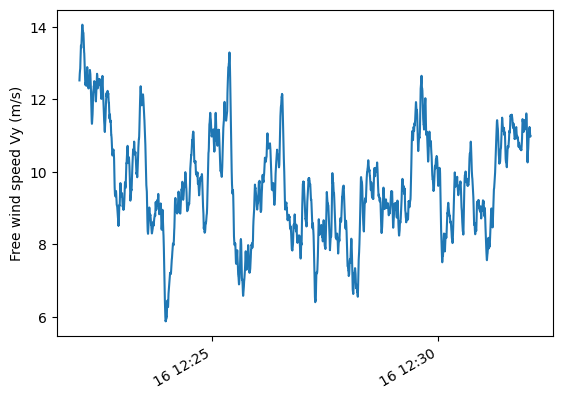

In [11]:
import matplotlib.pyplot as plt
import datetime

idx = "0"
w_serie = series[f'Exp{idx}'].loc[:, wind_columns[2]]
x = [datetime.datetime.now() +w_serie.index[i] for i in range(12000)]
plt.plot(x, w_serie)
plt.ylabel("Free wind speed Vy (m/s)")
plt.gcf().autofmt_xdate()
print(w_serie.head())

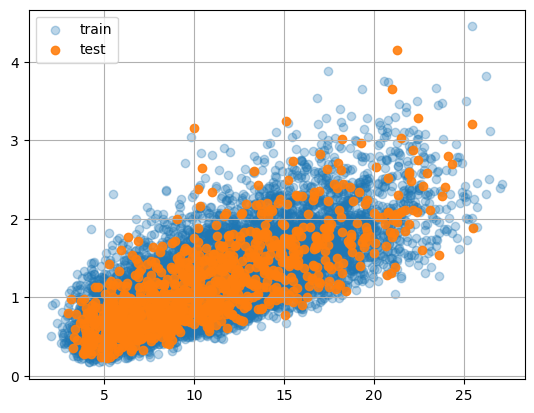

In [8]:
import matplotlib.pyplot as plt

import numpy as np
train_w_mean = []
train_w_std = []
test_w_mean = []
test_w_std = []
train_test_ratio = 0.9
for i, item in enumerate(series.items()):
    k, v = item 
    wf = v.loc[:, wind_columns[2]].to_numpy()
    if i < int(train_test_ratio*len(series)):
        train_w_mean.append(np.mean(wf))
        train_w_std.append(np.std(wf))
    else:
        test_w_mean.append(np.mean(wf))
        test_w_std.append(np.std(wf))

fig, ax = plt.subplots()
ax.scatter(train_w_mean, train_w_std, label='train', alpha=.3 )
ax.scatter(test_w_mean, test_w_std, label='test', alpha=.9)
ax.legend()
ax.grid(True)
